# Symbolic solutions of MacKay's "burglar alarm" example

Taken from Chapter 21 of the late David MacKay's classic book, [Information Theory, Inference, and Learning Algorithms](http://www.inference.phy.cam.ac.uk/itila/book.html).

> Example 21.1. Fred lives in Los Angeles and commutes 60 miles to work. Whilst at work, he receives a phone-call from his neighbour saying that Fred’s burglar alarm is ringing. What is the probability that there was a burglar in his house today? While driving home to investigate, Fred hears on the radio that there was a small earthquake that day near his home. ‘Oh’, he says, feeling relieved, ‘it was probably the earthquake that set off the alarm’. What is the probability that there was a burglar in his house? (After Pearl, 1988).

> Let’s introduce variables b (a burglar was present in Fred’s house today), a (the alarm is ringing), p (Fred receives a phonecall from the neighbour reporting the alarm), e (a small earthquake took place today near Fred’s house), and r (the radio report of earthquake is heard by Fred). 


In [1]:
from sympy import *
init_session()

from sympy.stats import P, E, variance, Die, Normal
from sympy import Eq, simplify
import sympy.stats
import numpy as np


IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [2]:
def noisy_or(a,b):
    # Equivalently, 1-(1-a)*(1-b), meaning NOT(NOT(a) AND NOT(b)) with AND implemented as probability multiplication
    return a+b-a*b

# Priors

Rates are per day (1/1000 ~ once every 3 years)

In [3]:
# Burglar
beta = Rational(1,1000)
b = sympy.stats.Bernoulli("b",beta)

# Earthquake
epsilon = Rational(1,1000)
e = sympy.stats.Bernoulli("e",epsilon)


# Alarm sensitivity to burglaries
# here I'm making esplicit the distinction between the probability of 
# being triggered and the corresponding random variable. This also
# allows to multiply the latter by the conditioned event ("and")
alpha_b = Rational(99,100)
a_b = sympy.stats.Bernoulli("a_b",alpha_b)

# Alarm sensitivity to earthquakes
alpha_e = Rational(1,100)
a_e = sympy.stats.Bernoulli("a_e",alpha_e)


# False alarm
a_f = Rational(1,1000)
f = sympy.stats.Bernoulli("f",a_f)


In [4]:
# Alarm - is a noisy or of three conditions
#  (a) burglar present, and alarm sensed it
#  (b) earthquake, and alarm sensed it
#  (c) not a false alarm

case_a = b * a_b
case_b = e * a_e
case_c = f

a=noisy_or(case_a,noisy_or(case_b,case_c))


## Solution

Probability of a burglar, given that the alarm sounded, if we don't know about the earthquake. Note how the P function correctly marginalizes over the states of the earthquake variable (true and false).


Well, actually P also marginalized over the combination of false alarms and detections. As far as I can say, there are 16 combinations in the numerator, and 32 in the denominator, i.e.: 
 1. burglar present
 1. burglar sensed
 2. earthquake sensed
 3. earthquake present
 4. false alarm present
 

In [5]:
# Takes a while, not sure why, but the answer is correct. 
p_burglar_given_alarm=P(Eq(b,1),Eq(a,1))

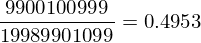

In [6]:
Eq(p_burglar_given_alarm,
   p_burglar_given_alarm.evalf(4),evaluate=False)

## Solution part 2

We know that both the alarm sounded, and that the earthquake occurred.

In [10]:
p_burglar_given_alarm_and_earthquake=P(Eq(b,1),  And(Eq(a,1),Eq(e,1)))

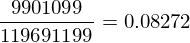

In [11]:
Eq(p_burglar_given_alarm_and_earthquake,
   p_burglar_given_alarm_and_earthquake.evalf(4),evaluate=False)

## Discussion

Note how counter-intuitive these inferences may be. Prior probabilities of burglary and earthquake are the same. However, alarm sensitivities to the two events are very different. One may expect earthquakes to be "unlikely" explanations, but above we saw that the chances of burglary are approximately even. 

Here, in the absence of information about the earthquake, the explanation lies in the high "false positive" $f$ (prior probability of alarm being triggered *regardless of anything*). In particular, it is comparable with the burglary rate. So the changes are even between burglary and an earthquake-independent false alarm. So, earthquakes are essentially irrelevant.

This can be verified as follows. We leave the "false positive" probability $f$ symbolic, and study varying it from 0 (never) to 10<sup>-2</sup> (far higher than burglaries). No further changes required. In fact, we should have probably made the whole calculation symbolic in the first place.

In [7]:
a_f_s = symbols("a_f_s")
f_s = sympy.stats.Bernoulli("f_s",a_f_s)
a_symbolic=noisy_or(case_a,noisy_or(case_b,f_s))

p_burglar_given_alarm_symbolic=P(Eq(b,1),Eq(a_symbolic,1))  # Long expression

In [9]:
for f in (0, 0.0001, 0.001, 0.01):
    print(f, end=" -> ")
    pprint(p_burglar_given_alarm_symbolic.subs(a_f_s,f).evalf(4))

# Probability of burglary w.r.t. false alarm triggering rate.

0 -> 0.9900
0.0001 -> 0.9001
0.001 -> 0.4953
0.01 -> 0.09009


In part 2 of the solution, given that the occurrence of an earthquake is known, the balances are tipped. The a-priori unlikely earthquake has occurred; it is true that 99% of the times it will be ignored by the alarm. But still this 1% probability is far higher than the 0.1% a-priori probability of burglary. 


## Desiderata
Would it be possible to display a tree of variable dependencies? 


In [ ]:
%qtconsole